In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
import scipy.optimize as so
import functools

In [3]:
def allan_FOGM(sigma, rho, ms):
    '''
    Takes in two doubles defining a FOGM (sigma and rho) and the values at which
    their Allan Variance should be charaterized (ms) and returns the corresponding
    Allan Variance values

    Inputs:
    -   sigma:  What the marginal variance is at each sample
    -   rho:  Correlation between adjacent values
    -   ms:  Size of the blocks to be averaged (corresponds with tau when multiplied by dt)
    
    Outputs: an np.array of values of the same size as ms
    '''
    going_out = np.zeros(len(ms))
    for i,m in enumerate(ms):
        tmp = 1-rho
        tmp2 = m + 2*rho/tmp *(m-(1-rho**m)/tmp) - rho * ((1-rho**m)/tmp)**2
        going_out[i] = tmp2*sigma**2/m**2
    return going_out

def d_allan_FOGM_d_m(sigma, rho, m):
    '''
    Takes in two doubles defining a FOGM (sigma and rho) and the values at which
    the derivative should be computed (m) and returns the corresponding derivative

    Inputs:
    -   sigma:  What the marginal variance is at each sample
    -   rho:  Correlation between adjacent values
    -   m:  Value at which the derivative should be computed
    
    Outputs: an np.array of values of the same size as ms
    '''
    tmp = 1-rho
    tmp1 = rho**m
    tmp2 = m + 2*rho/tmp *(m-(1-tmp1)/tmp) - rho * ((1-tmp1)/tmp)**2
    tmp3 = -2*sigma**2/m**3 * tmp2
    tmp4 = sigma**2/m**2 * (1+ 2*rho/tmp * (1 + tmp1 * log(rho)/tmp) + 2*rho * (1-tmp1)/tmp**2 * tmp1 * log(rho))
    return tmp3+tmp4

Functions defined. Now let's analyze them

for rho of 0.9, last slope is -1.8994600000000004e-09
for rho of 0.99, last slope is -1.984059999999998e-08
for rho of 0.995, last slope is -3.966119999999997e-08
for rho of 0.999, last slope is -1.9390599999999986e-07


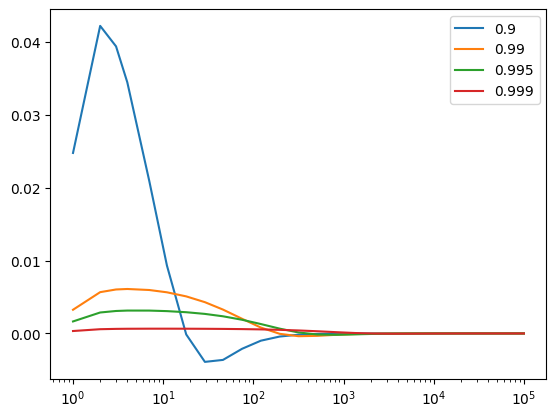

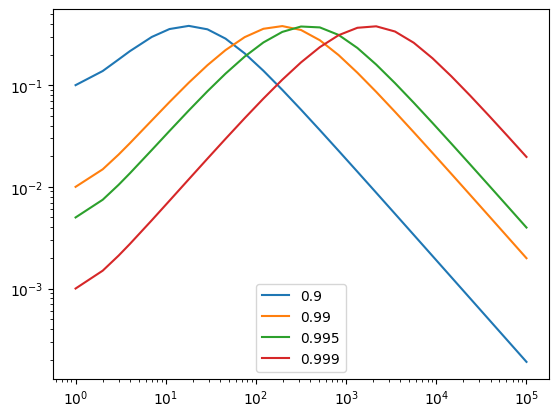

In [4]:
rhos = [.9, .99, .995, .999]
ms = np.rint(np.logspace(0,5,25, endpoint=True))
for rho in rhos:
    da_dm = [d_allan_FOGM_d_m(1,rho,m) for m in ms]
    plt.figure(1)
    plt.plot(ms,da_dm,label=f'{rho}')
    allan_vals = allan_FOGM(1,rho,ms)
    plt.figure(2)
    plt.loglog(ms,allan_vals,label=f'{rho}')
    print(f'for rho of {rho}, last slope is {da_dm[-1]}')
plt.figure(1)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

plt.figure(2)
plt.legend()
plt.show()

# Find the hump and the value at that hump

In [10]:
for rho in [.999, .9999, .99999, .999999]:
    func = functools.partial(d_allan_FOGM_d_m,1,rho)
    peak = so.fsolve(func,1/(1-rho))
    print(f'for rho of {rho}, peak is at {peak}, value is {allan_FOGM(1,rho,peak)}')
    # It worked so remove this line...
    print(f'to double check, f(peak) is {d_allan_FOGM_d_m(1,rho,peak)}')
    print(f'2/(1-rho) is {2/(1-rho)}, ratio is {peak/2*(1-rho)}')

for rho of 0.999, peak is at [1891.67003426], value is [0.3811388]
to double check, f(peak) is [1.08420217e-19]
2/(1-rho) is 1999.9999999999982, ratio is [0.94583502]
for rho of 0.9999, peak is at [18925.23187143], value is [0.38113866]
to double check, f(peak) is [-1.35525272e-20]
2/(1-rho) is 20000.0000000022, ratio is [0.94626159]
for rho of 0.99999, peak is at [189260.83696956], value is [0.38113866]
to double check, f(peak) is [-1.69406589e-21]
2/(1-rho) is 200000.0000009102, ratio is [0.94630418]
for rho of 0.999999, peak is at [1892616.88656019], value is [0.38113866]
to double check, f(peak) is [-1.05879118e-22]
2/(1-rho) is 1999999.9999424887, ratio is [0.94630844]


# What I've learned:
1. The "top" value is essentially the same for different rho's.  The odd part is it seems to be converging to ~.381139 (times sigma**2).  Smaller rho values are ever so slightly larger
2. The peak lies at a 'm' value slightly smaller than 2/(1-rho) (~.946 to be exact)
